In [ ]:
import tensorflow as tf

from pathlib import Path
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Checking for CUDA gpus
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.11.0
/device:GPU:0
Num GPUs Available:  1


In [ ]:
# Image Path
data_path = Path("/content/drive/MyDrive/")
image_path = data_path / "brain-tumor-mri"
for dirpath, dirnames, filenames in os.walk(image_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} image in {dirpath}.")

There are 3 directories and 0 image in /content/drive/MyDrive/brain-tumor-mri.
There are 4 directories and 0 image in /content/drive/MyDrive/brain-tumor-mri/Training.
There are 0 directories and 827 image in /content/drive/MyDrive/brain-tumor-mri/Training/pituitary_tumor.
There are 0 directories and 822 image in /content/drive/MyDrive/brain-tumor-mri/Training/meningioma_tumor.
There are 0 directories and 826 image in /content/drive/MyDrive/brain-tumor-mri/Training/glioma_tumor.
There are 0 directories and 395 image in /content/drive/MyDrive/brain-tumor-mri/Training/no_tumor.
There are 0 directories and 0 image in /content/drive/MyDrive/brain-tumor-mri/.ipynb_checkpoints.
There are 4 directories and 0 image in /content/drive/MyDrive/brain-tumor-mri/Testing.
There are 0 directories and 74 image in /content/drive/MyDrive/brain-tumor-mri/Testing/pituitary_tumor.
There are 0 directories and 115 image in /content/drive/MyDrive/brain-tumor-mri/Testing/meningioma_tumor.
There are 0 directories

In [ ]:
# Setup train and test paths
train_dir = image_path / "Training"
test_dir = image_path / "Testing" 

In [ ]:
# Collecting the images and labels
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(train_dir,i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(test_dir,i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
# Splitting the training data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.1, shuffle = True, random_state = 42)

In [ ]:
# Encoding the labels
y_train_num = []
for i in y_train:
    y_train_num.append(labels.index(i))
y_train=y_train_num
y_train = tf.keras.utils.to_categorical(y_train)

y_test_num = []
for i in y_test:
    y_test_num.append(labels.index(i))
y_test=y_test_num
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", input_shape = (150,150,3)),
    tf.keras.layers.Conv2D(64, kernel_size = 3, activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, kernel_size = 3, activation = "relu"),
    tf.keras.layers.Conv2D(64, kernel_size = 3, activation = "relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, kernel_size = 3, activation = "relu"),
    tf.keras.layers.Conv2D(128, kernel_size = 3, activation = "relu"),
    tf.keras.layers.Conv2D(128, kernel_size = 3, activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, kernel_size = 3, activation = "relu"),
    tf.keras.layers.Conv2D(256, kernel_size = 3, activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation = "softmax")
])

In [ ]:
# Looking at the shape parameters throughout the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
# Compiling the model with a loss function and optimizer
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
# Train the model
tf.config.get_visible_devices()
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 26s 137ms/step - loss: 1.9799 - accuracy: 0.2841 - val_loss: 1.3744 - val_accuracy: 0.3027
Epoch 2/20
83/83 [==============================] - 8s 101ms/step - loss: 1.2652 - accuracy: 0.3825 - val_loss: 1.1609 - val_accuracy: 0.4796
Epoch 3/20
83/83 [==============================] - 8s 100ms/step - loss: 1.0133 - accuracy: 0.5626 - val_loss: 1.0204 - val_accuracy: 0.5238
Epoch 4/20
83/83 [==============================] - 8s 98ms/step - loss: 0.8675 - accuracy: 0.6205 - val_loss: 0.9315 - val_accuracy: 0.5748
Epoch 5/20
83/83 [==============================] - 8s 98ms/step - loss: 0.7729 - accuracy: 0.6697 - val_loss: 0.8865 - val_accuracy: 0.6122
Epoch 6/20
83/83 [==============================] - 8s 98ms/step - loss: 0.7129 - accuracy: 0.6939 - val_loss: 0.8019 - val_accuracy: 0.6429
Epoch 7/20
83/83 [==============================] - 8s 98ms/step - loss: 0.6016 - accuracy: 0.7446 - val_loss: 0.7217 - val_accuracy: 0.6837
Epoch 8/2

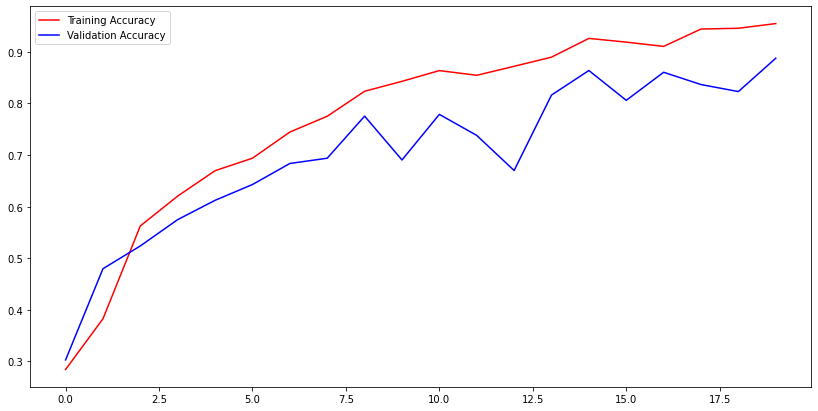

In [ ]:
# Creating a plot for the train and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')

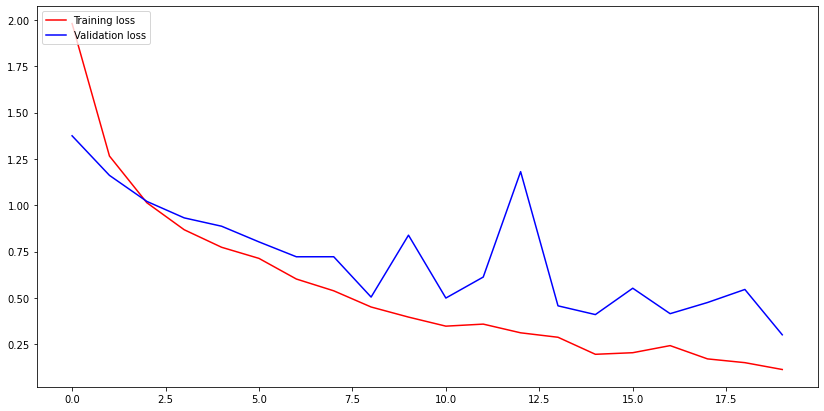

In [ ]:
# Creating a plot for the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')

In [ ]:
# Evaluate the model on the test data
model.evaluate(X_test, y_test)

11/11 [==============================] - 1s 60ms/step - loss: 0.2443 - accuracy: 0.9327


[0.24425461888313293, 0.932721734046936]